# Lección 7 - Ejercicios

In [61]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path

pd.set_option('display.max_columns', 150)

%matplotlib inline

In [62]:
data = pd.read_csv('Chicago_Crimes_2017.csv')
print(data.shape)
data.head()

(11357, 22)


,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,Location Description,Arrest,Domestic,Beat,District,Ward,CommunityArea,FBICode,X Coordinate,Y Coordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10801165,JA100077,01/01/2017 01:00:00 AM,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,1824,18.0,42.0,8.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
1,10801166,JA100115,01/01/2017 01:23:00 AM,084XX S SANGAMON ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,613,6.0,21.0,71.0,24,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
2,10801090,JA100010,01/01/2017 12:01:00 AM,064XX S STONY ISLAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,314,3.0,5.0,42.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
3,10801101,JA100031,01/01/2017 12:00:00 AM,074XX S SOUTH CHICAGO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,324,3.0,5.0,69.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
4,10801104,JA100015,01/01/2017 12:00:00 AM,004XX W 66TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,722,7.0,20.0,68.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN


In [63]:
data['PrimaryType'].value_counts()

THEFT                                2493
BATTERY                              1974
CRIMINAL DAMAGE                      1305
OTHER OFFENSE                         874
ASSAULT                               774
MOTOR VEHICLE THEFT                   712
BURGLARY                              667
DECEPTIVE PRACTICE                    652
ROBBERY                               613
NARCOTICS                             411
CRIMINAL TRESPASS                     317
WEAPONS VIOLATION                     177
OFFENSE INVOLVING CHILDREN             96
CRIM SEXUAL ASSAULT                    64
PUBLIC PEACE VIOLATION                 54
INTERFERENCE WITH PUBLIC OFFICER       47
PROSTITUTION                           32
HOMICIDE                               31
SEX OFFENSE                            20
ARSON                                  13
STALKING                                7
KIDNAPPING                              6
INTIMIDATION                            6
CONCEALED CARRY LICENSE VIOLATION 

## Ejercicio 1

Genera un gráfico de barras que contenga el nº de siniestros ocurrido en cada mes del año. El gráfico será tal que así:

In [64]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['month'] = data['Date'].dt.month

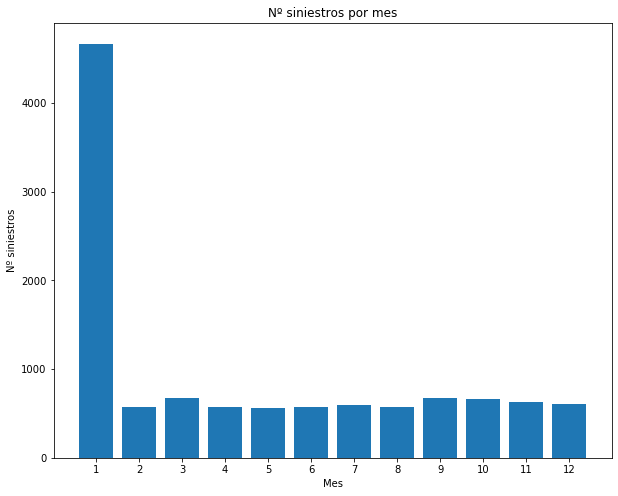

In [65]:
crimes_by_month = data.groupby('month').size()

fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(x = crimes_by_month.index, height = crimes_by_month.values)

ax.set_xticks(np.arange(1,13))
ax.set_title("Nº siniestros por mes")
ax.set_ylabel("Nº siniestros")
ax.set_xlabel('Mes')
pass

## Ejercicio 2

Añade al gráfico anterior, usando puntos, el nº de siniestros cuyo Primary Type = 'Battery'. 
- Representa esos puntos usando el eje derecho. 
- Muestra una leyenda con el significado de ambos

El gráfico sería algo tal que así:

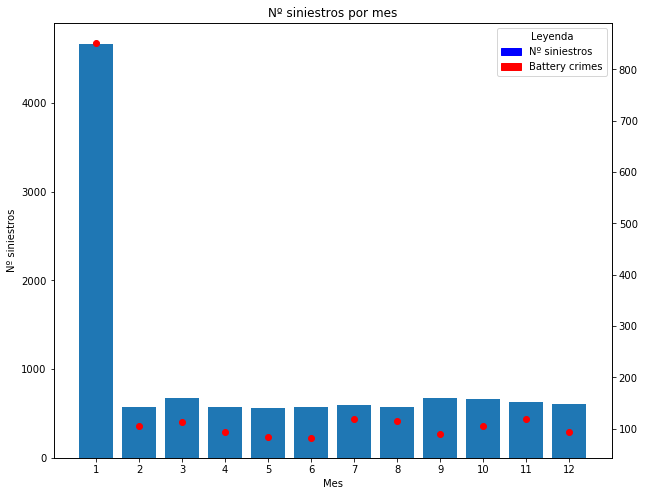

In [66]:
import matplotlib.patches as mpatches

crimes_by_month = data.groupby('month').size()
crimes_battery = data[data['PrimaryType'] == "BATTERY"].groupby('month').size()


fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(x = crimes_by_month.index, height = crimes_by_month.values, label = 'Nº Siniestros')
ax.set_xticks(np.arange(1,13))
ax.set_title("Nº siniestros por mes")
ax.set_ylabel("Nº siniestros")
ax.set_xlabel('Mes')

ax1 = ax.twinx()
ax1.scatter(x = crimes_battery.index, y = crimes_battery.values, c = 'red', label = 'Battery crimes')

bar = mpatches.Patch(color='blue', label='Nº siniestros')
point = mpatches.Patch(color='red', label='Battery crimes')
plt.legend(handles=[bar, point], title = 'Leyenda')

pass

## Ejercicio 3

Filtra solo los siniestros cuyo Primary Type son "THEFT", "BATTERY", "CRIMINAL DAMAGE" o "OTHER OFFENSE". Luego, genera 2 gráficos en el mismo fig.

- El primero, será un gráfico de tartas que muestre el % que representa cada tipo en el dataset.
- El segundo, será un gráfico de puntos, representando el nº de siniestros de cada tipo en cada mes.

El resultado final, sería algo tal que así:

In [88]:
num = df.groupby(['PrimaryType', 'month']).size().unstack().T
num

PrimaryType,BATTERY,CRIMINAL DAMAGE,OTHER OFFENSE,THEFT
month,,,,
1,852,538,328,1055
2,106,72,42,112
3,114,81,44,132
4,93,54,47,156
5,84,67,50,122
6,82,68,40,118
7,120,59,42,114
8,115,68,56,103
9,89,88,48,152


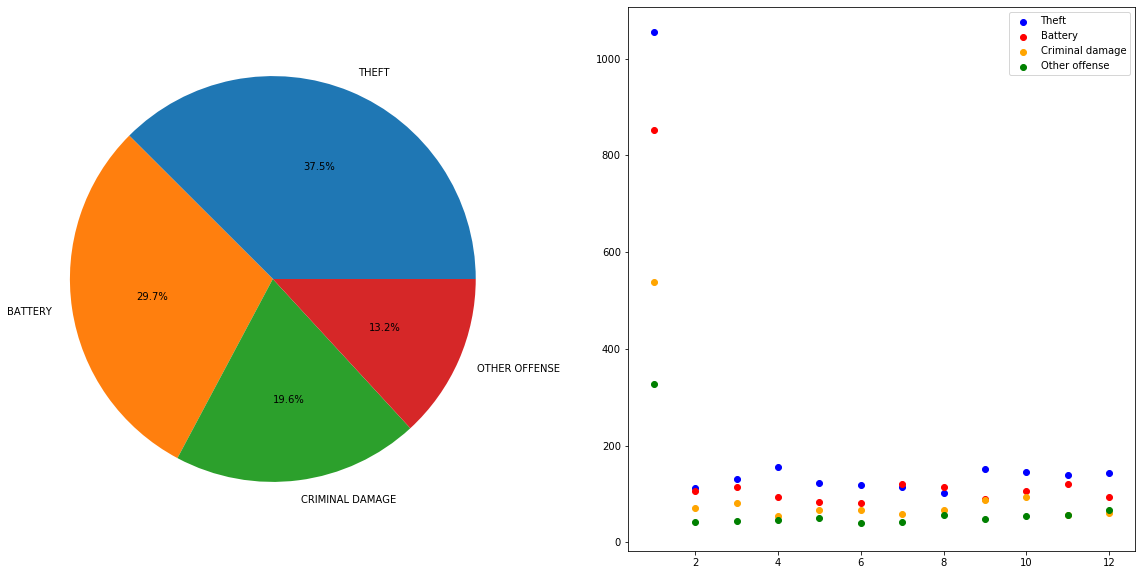

In [91]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

df = data.query('PrimaryType in ["THEFT", "BATTERY", "CRIMINAL DAMAGE", "OTHER OFFENSE"]')
vc = df.PrimaryType.value_counts(normalize = True).mul(100)
num = df.groupby(['PrimaryType', 'month']).size().unstack().T

ax[0].pie(vc, labels = vc.index, autopct='%1.1f%%')
ax[1].scatter(x = num.index, y = num['THEFT'], c = 'blue', label = 'Theft')
ax[1].scatter(x = num.index, y = num['BATTERY'], c = 'red', label = 'Battery')
ax[1].scatter(x = num.index, y = num['CRIMINAL DAMAGE'], c = 'orange', label = 'Criminal damage')
ax[1].scatter(x = num.index, y = num['OTHER OFFENSE'], c = 'green', label = 'Other offense')
ax[1].legend()

pass